In [2]:
#import Dependencies
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pylab,pyplot
from functools import reduce
from pylab import *

In [3]:
# create two empty list for get_data as yes and no:
yes=[] # contain yes
no=[]  # contain no
label=[]
n=0    # contain no class in dataset

In [4]:
def get_data(filename):
    global n   # make n as global variable
    with open(filename,'r') as csvfile:
        csvFileReader=csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            no.append(float(row[2]))
            yes.append(float(row[1]))
            label.append(str(row[0]))
            n+=1
    return

In [6]:

# Define all the variabel which store the result: 

probabiltyOfyes=0.0  # probability of yes p(yes)
probabiltyOfno=0.0   # probabilty of no p(no)
probOflabel=[]       # probablity of label p ( label[i] ) for each labels
probOfLabelYes=[]    # probability  p ( label[i] | yes)
probOfLabelNo=[]     # probability  p ( label[i] | No)
probOfYesLabel=[]    # probability  p (yes |label[i])
probOfNoLabel=[]     # probability of  p (no | label[i])

# as the output of NaiveBayes :
# P(Yes | label) = P( label | Yes) * P(Yes) / P (label) 


In [7]:
def dataframe(src):
    data=pd.read_csv(src)
    return data

In [8]:

def NaiveBayes(src):
    get_data(src)
    global probabiltyOfyes
    global probabiltyOfno
    yestotal=reduce(lambda x,y:x+y , yes)
    nototal=reduce(lambda x,y:x+y, no)
    total=yestotal+nototal
    probabiltyOfyes=(yestotal/total) # probability of yes p(yes)
    probabiltyOfno=(nototal/total)   # probabilty of no p(no)
    for i in range(n):
        probOflabel.append((yes[i]+no[i])/total)
    
    for i in range(n): 
        probOfLabelYes.append(yes[i]/yestotal)

    for i in range(n):
        probOfLabelNo.append(no[i]/nototal)
        
    for i in range(n):
        probOfYesLabel.append((probOfLabelYes[i]*probabiltyOfyes)/probOflabel[i])

    for i in range(n):
        probOfNoLabel.append((probOfLabelNo[i]*probabiltyOfno)/probOflabel[i])
    
    return 

In [9]:

src='test.csv' # set the path where the csv file is located

NaiveBayes(src)
print(dataframe(src))
print(" ")
print("p(yes) : "+ str(probabiltyOfyes))  # probability of yes p(yes)
print("p(no) : "+ str(probabiltyOfno))   # probabilty of no p(no)
print("p(label) : " + str(probOflabel))       # probablity of label p ( label[i] ) for each labels
print("p(label|yes) : "+ str(probOfLabelYes))    # probability  p ( label[i] | yes)
print("p(label|no) : "+ str(probOfLabelNo))     # probability  p ( label[i] | No)
print("p(yes|label) : "+ str(probOfYesLabel))    # probability  p (yes |label[i])
print("p(no|label) : "+ str(probOfNoLabel)) 


    label       yes        no
0     BJP  13464.18  26829.82
1  SP+INC  13090.13  27203.87
2     BSP   9265.45  31028.55
3  Others   4474.24  35819.20
 
p(yes) : 0.25000086861869275
p(no) : 0.7499991313813072
p(label) : [0.25000086861869275, 0.25000086861869275, 0.25000086861869275, 0.24999739414392164]
p(label|yes) : [0.3341485084627985, 0.32486548865836107, 0.22994614582816306, 0.11103985705067754]
p(label|no) : [0.22195152539546187, 0.2250458796652323, 0.2566858071842956, 0.2963167877550102]
p(yes|label) : [0.3341485084627985, 0.32486548865836107, 0.22994614582816306, 0.11104140028749099]
p(no|label) : [0.6658514915372017, 0.675134511341639, 0.7700538541718371, 0.8889585997125092]


In [10]:
# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

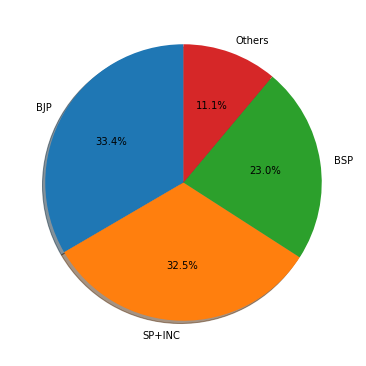

In [11]:

# The slices will be ordered and plotted counter-clockwise.
#labels = 'l1', 'l2', 'l3', 'l4'
explode=(0, 0.0, 0, 0)

pie(probOfYesLabel, explode=explode, labels=label,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

show()
